In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# New Section

# Nová sekcia

In [ ]:
# funkcia sluzi na premenovanie "Unknown" v MultiIndexe na prazdny text (z internetu)
def rename_unnamed(df, label=""):
    for i, columns_old in enumerate(df.columns.levels):
        columns_new = np.where(columns_old.str.contains('Unnamed'), '', columns_old)
        df.rename(columns=dict(zip(columns_old, columns_new)), level=i, inplace=True)   
                        # zip zliepa old s new, pricom v new su zmenene hodnoty z Unnamed na "", a tym nahradi mena Unnamed a ponecha povodne nazvy

# ulahcuje indexovanie
idx=pd.IndexSlice       # volaj takto: df.loc[idx["riadok_level1","riadok_level2",:], idx[:,:,"stplec_level3"]]



In [ ]:
# priprava tabulky

# import tabulky, nastavenie indexov
whole_data=pd.read_excel("whole_data.xlsx", header=[0,1,2], index_col=[0,1,2])
whole_data.pop("Mesiac")
rename_unnamed(whole_data)

# prida stlpec cisla, kde pre kazdy mesiac v kazdom roku priradi svoje cislo (ma zmysel potom pri vykreslovani grafov)
cisla=()
for i in range(10*12-10): cisla+=88*(i,)
#print(cisla[-200:])
whole_data.insert(loc=0, column="Cislo", value=cisla)

display(whole_data.head(3))

Cislo * Odtok UoZ v mesiaci * Prítok UoZ v mesiaci  \
                                                                                
                                                                                
Rok  Mesiac Územie                                                              
2013 Január Bratislava I       0                   112                     10   
            Bratislava II      0                   328                    316   
            Bratislava III     0                   187                     43   

                           Disponibilný počet uchádzačov o zamestnanie  \
                                                                         
                                                                         
Rok  Mesiac Územie                                                       
2013 Január Bratislava I                                           884   
            Bratislava II                                         3322   
            Bratislava III                                        1759   

                           Ekonomicky aktívne obyvateľstvo  \
                                                             
                                                             
Rok  Mesiac Územie                                           
2013 Január Bratislava I                      19605.666667   
            Bratislava II                     57568.250000   
            Bratislava III                    32538.916667   

                           MIERA EVIDOVANEJ nezamestnanosti (v %)  \
                                                                    
                                                                    
Rok  Mesiac Územie                                                  
2013 Január Bratislava I                                 4.508900   
            Bratislava II                                5.770542   
            Bratislava III                               5.405835   

                           Medzi-mesačný nárast, resp. pokles UoZ (v %)  \
                                                                          
                                                                          
Rok  Mesiac Územie                                                        
2013 Január Bratislava I                                      -8.754864   
            Bratislava II                                      0.568666   
            Bratislava III                                    -7.067138   

                           Miera nezamestnanosti vypočítaná z celkového počtu UoZ (v %)  \
                                                                                          
                                                                                          
Rok  Mesiac Územie                                                                        
2013 Január Bratislava I                                             4.784331             
            Bratislava II                                            6.144012             
            Bratislava III                                           5.657840             

                           Nedisponibilný počet uchádzačov o zamestnanie  \
                                                                   spolu   
                                                                           
Rok  Mesiac Územie                                                         
2013 Január Bratislava I                                              54   
            Bratislava II                                            215   
            Bratislava III                                            82   

                                                                   \
                                      z toho                        
                           Absolventská prax Dobrovoľnícka služba   
Rok  Mesiac Územie                                                  
2013 Január Bratislava I                   7    

In [ ]:
whole_data.loc[:,idx["Medzi-mesačný nárast, resp. pokles UoZ (v %)",:,:]]=(
    (whole_data.loc[:,idx["Stav UoZ ku koncu mesiaca"]]-whole_data.loc[:,idx["Stav UoZ ku koncu predch. mesiaca"]])/(whole_data.loc[:,idx["Stav UoZ ku koncu predch. mesiaca"]])*100
)
display(whole_data)

Cislo * Odtok UoZ v mesiaci  \
                                                            
                                                            
Rok  Mesiac  Územie                                         
2013 Január  Bratislava I         0                   112   
             Bratislava II        0                   328   
             Bratislava III       0                   187   
             Bratislava IV        0                   285   
             Bratislava V         0                   476   
...                             ...                   ...   
2022 Február Sobrance           109                    59   
             Spišská Nová Ves   109                   307   
             Trebišov           109                   335   
             Košický kraj       109                  2377   
             Slovensko          109                 15730   

                              * Prítok UoZ v mesiaci  \
                                                       
                                                       
Rok  Mesiac  Územie                                    
2013 Január  Bratislava I                         10   
             Bratislava II                       316   
             Bratislava III                       43   
             Bratislava IV                       312   
             Bratislava V                        590   
...                                              ...   
2022 Február Sobrance                             70   
             Spišská Nová Ves                    298   
             Trebišov                            317   
             Košický kraj                       2286   
             Slovensko                         13263   

                              Disponibilný počet uchádzačov o zamestnanie  \
                                                                            
                                                                            
Rok  Mesiac  Územie                                                         
2013 Január  Bratislava I                                             884   
             Bratislava II                                           3322   
             Bratislava III                                          1759   
             Bratislava IV                                           2690   
             Bratislava V                                            4188   
...                                                                   ...   
2022 Február Sobrance                                                1591   
             Spišská Nová Ves                                        4018   
             Trebišov                                                6283   
             Košický kraj                                           38037   
             Slovensko                                             185383   

                              Ekonomicky aktívne obyvateľstvo  \
                                                                
                                                                
Rok  Mesiac  Územie                                             
2013 Január  Bratislava I                        1.960567e+04   
             Bratislava II                       5.756825e+04   
             Bratislava III                      3.253892e+04   
             Bratislava IV                       5.116658e+04   
             Bratislava V                        7.292242e+04   
...                                                       ...   
2022 Február Sobrance                            1.034300e+04   
             Spišská Nová Ves                    4.400200e+04   
             Trebišov                            4.876700e+04   
             Košický kraj                        3.720210e+05   
             Slovensko                           2.701667e+06   

                              MIERA EVIDOVANEJ nezamestnanosti (v %)  \
                                                                     

In [ ]:
print(whole_data.isna().sum())
len(whole_data)

Cislo                                                                                                            0
* Odtok UoZ v mesiaci                                                                                            0
* Prítok UoZ v mesiaci                                                                                           0
Disponibilný počet uchádzačov o zamestnanie                                                                      0
Ekonomicky aktívne obyvateľstvo                                                                                  0
MIERA EVIDOVANEJ nezamestnanosti (v %)                                                                           0
Medzi-mesačný nárast, resp. pokles UoZ (v %)                                                                     0
Miera nezamestnanosti vypočítaná z celkového počtu UoZ (v %)                                                     0
Nedisponibilný počet uchádzačov o zamestnanie                 spolu             

9680

In [ ]:
# pomocny zoznam s okresmi, krajmi a Slovenskom
uzemia_zoz=()
for a in whole_data.loc[idx[2013,"Január",:],:].index.values:
    uzemia_zoz+=(a[2],)
print(" | ".join(uzemia_zoz))

Bratislava I | Bratislava II | Bratislava III | Bratislava IV | Bratislava V | Malacky | Pezinok | Senec | Bratislavský kraj | Dunajská Streda | Galanta | Hlohovec | Piešťany | Senica | Skalica | Trnava | Trnavský kraj | Bánovce nad Bebravou | Ilava | Myjava | Nové Mesto nad Váhom | Partizánske | Považská Bystrica | Prievidza | Púchov | Trenčín | Trenčiansky kraj | Komárno | Levice | Nitra | Nové Zámky | Šaľa | Topoľčany | Zlaté Moravce | Nitriansky kraj | Bytča | Čadca | Dolný Kubín | Kysucké Nové Mesto | Liptovský Mikuláš | Martin | Námestovo | Ružomberok | Turčianske Teplice | Tvrdošín | Žilina | Žilinský kraj | Banská Bystrica | Banská Štiavnica | Brezno | Detva | Krupina | Lučenec | Poltár | Revúca | Rimavská Sobota | Veľký Krtíš | Zvolen | Žarnovica | Žiar nad Hronom | Banskobystrický kraj | Bardejov | Humenné | Kežmarok | Levoča | Medzilaborce | Poprad | Prešov | Sabinov | Snina | Stará Ľubovňa | Stropkov | Svidník | Vranov nad Topľou | Prešovský kraj | Gelnica | Košice I | Koši

/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:1068: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (3 levels on the left,1 on the right)
  right_index=True,


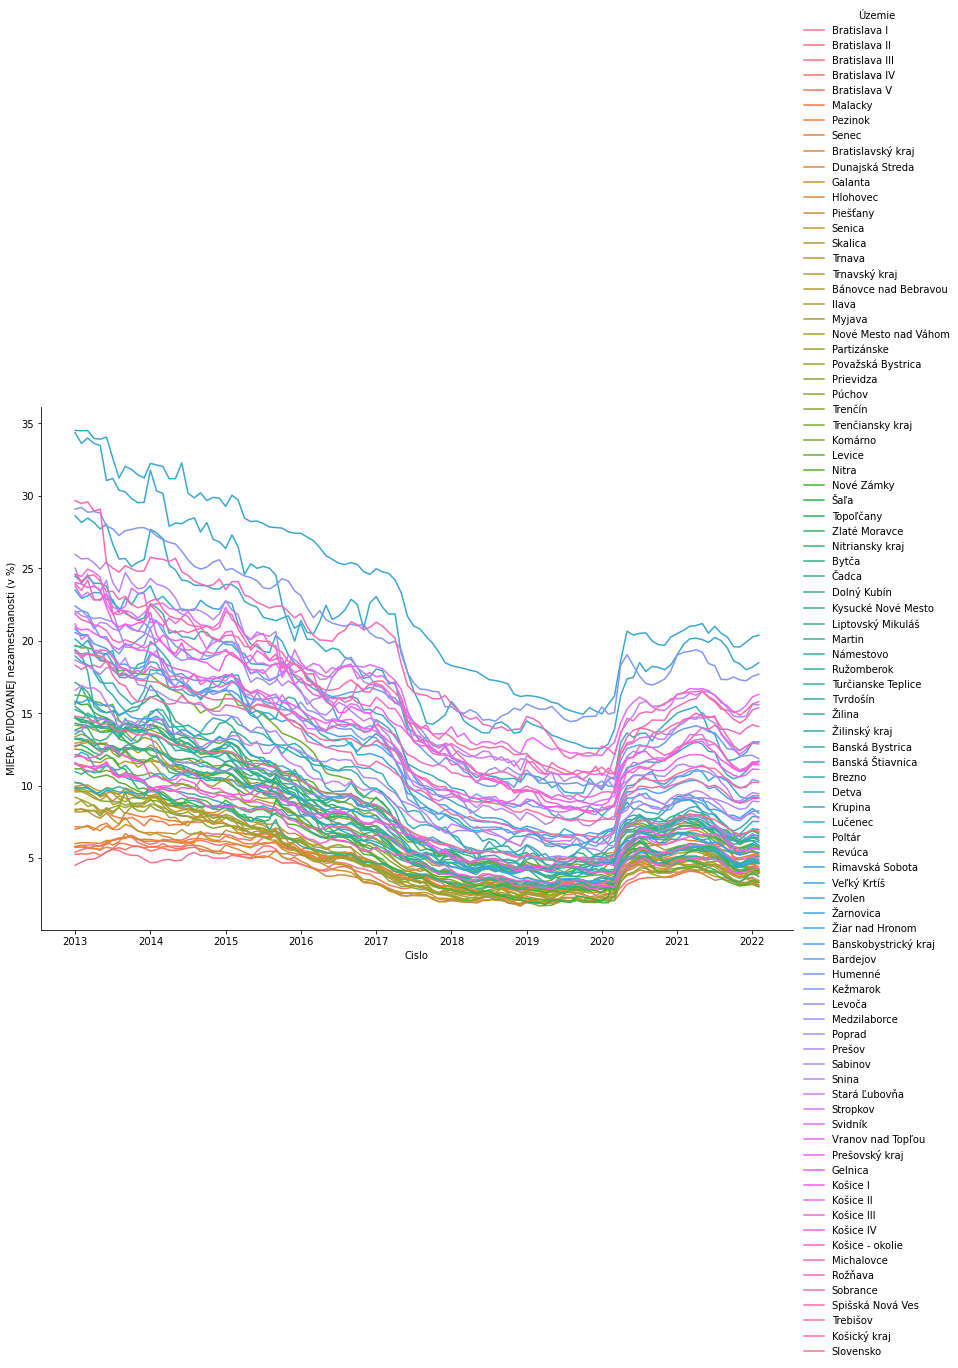

In [ ]:
# vsetky kraje v jednom grafe
a=sns.relplot(data=whole_data, 
    hue="Územie", x="Cislo", y="MIERA EVIDOVANEJ nezamestnanosti (v %)",
    height=8, aspect=1.4142/1, kind="line")
a.set(xticks=list(range(0,10*12,12)))
a.set_xticklabels(list(range(2013,2023)))
#a.fig.suptitle("MIERA EVIDOVANEJ nezamestnanosti (v %)")

/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:1068: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (3 levels on the left,1 on the right)
  right_index=True,


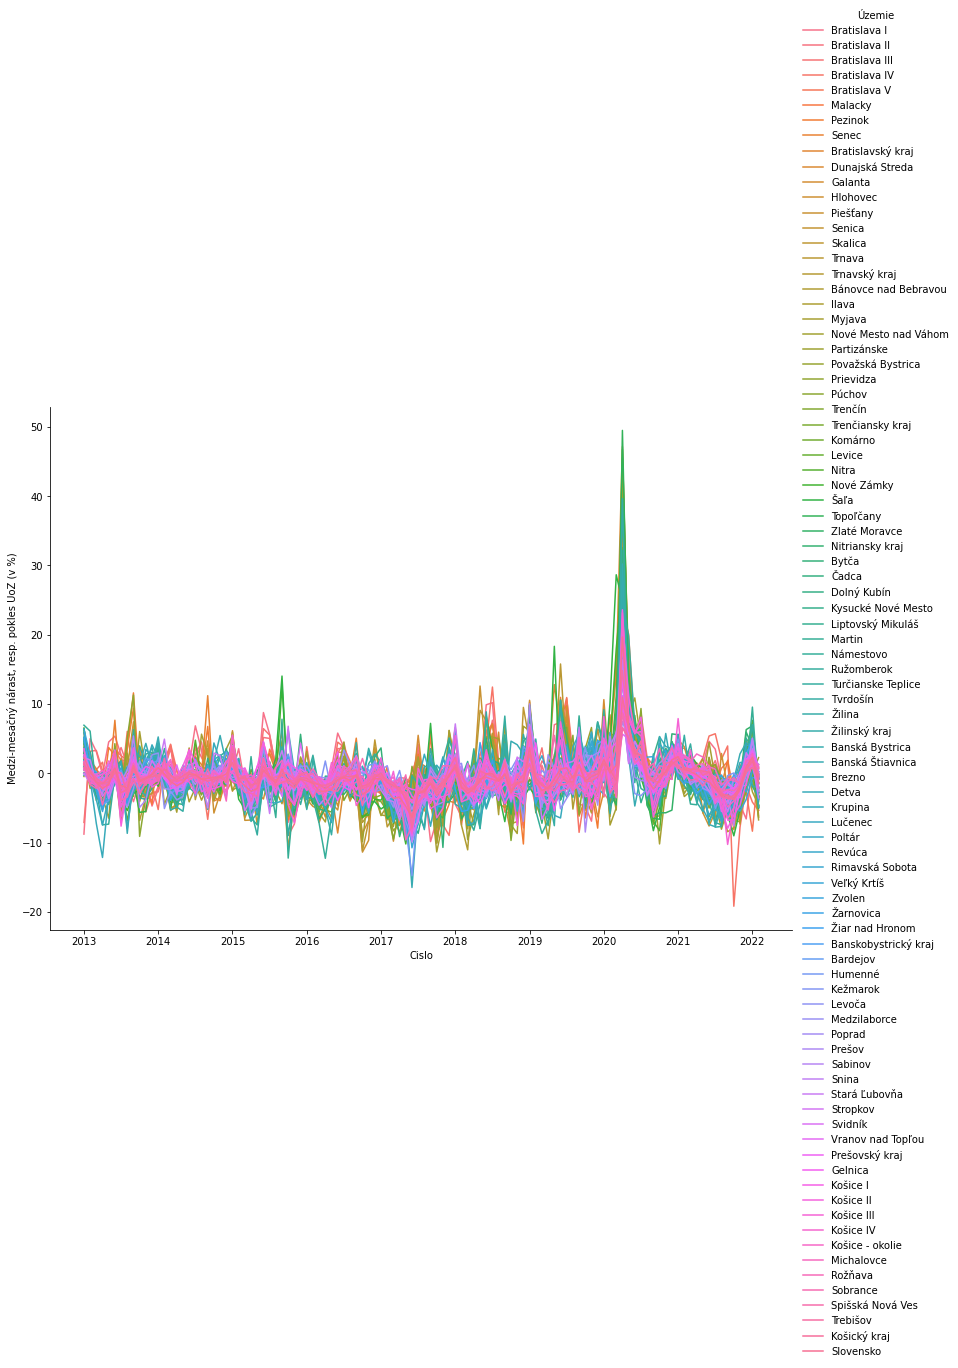

In [ ]:
# vsetky kraje v jednom grafe
a=sns.relplot(data=whole_data, 
    hue="Územie", x="Cislo", y="Medzi-mesačný nárast, resp. pokles UoZ (v %)",
    height=8, aspect=1.4142/1, kind="line")
a.set(xticks=list(range(0,10*12,12)))
a.set_xticklabels(list(range(2013,2023)))
#a.fig.suptitle("MIERA EVIDOVANEJ nezamestnanosti (v %)")

In [ ]:
display(whole_data.loc[idx[2020,["Marec","Apríl","Máj"],"Bratislava I"],:])

Cislo * Odtok UoZ v mesiaci * Prítok UoZ v mesiaci  \
                                                                              
                                                                              
Rok  Mesiac Územie                                                            
2020 Marec  Bratislava I    86                    55                     61   
     Apríl  Bratislava I    87                    26                     83   
     Máj    Bratislava I    88                    43                     62   

                         Disponibilný počet uchádzačov o zamestnanie  \
                                                                       
                                                                       
Rok  Mesiac Územie                                                     
2020 Marec  Bratislava I                                         565   
     Apríl  Bratislava I                                         655   
     Máj    Bratislava I                                         762   

                         Ekonomicky aktívne obyvateľstvo  \
                                                           
                                                           
Rok  Mesiac Územie                                         
2020 Marec  Bratislava I                         22046.0   
     Apríl  Bratislava I                         22091.0   
     Máj    Bratislava I                         22091.0   

                         MIERA EVIDOVANEJ nezamestnanosti (v %)  \
                                                                  
                                                                  
Rok  Mesiac Územie                                                
2020 Marec  Bratislava I                                   2.56   
     Apríl  Bratislava I                                   2.97   
     Máj    Bratislava I                                   3.45   

                         Medzi-mesačný nárast, resp. pokles UoZ (v %)  \
                                                                        
                                                                        
Rok  Mesiac Územie                                                      
2020 Marec  Bratislava I                                     0.837521   
     Apríl  Bratislava I                                    13.787375   
     Máj    Bratislava I                                    15.620438   

                         Miera nezamestnanosti vypočítaná z celkového počtu UoZ (v %)  \
                                                                                        
                                                                                        
Rok  Mesiac Územie                                                                      
2020 Marec  Bratislava I                                               2.73             
     Apríl  Bratislava I                                               3.10             
     Máj    Bratislava I                                               3.59             

                         Nedisponibilný počet uchádzačov o zamestnanie  \
                                                                 spolu   
                                                                         
Rok  Mesiac Územie                                                       
2020 Marec  Bratislava I                                            37   
     Apríl  Bratislava I                                            30   
     Máj    Bratislava I                                            30   

                                                                 \
                                    z toho                        
                         Absolventská prax Dobrovoľnícka služba   
Rok  Mesiac Územie                                                
2020 Marec  Bratislava I                 3                  0.0   
     Apríl  Bratislava I                 3                  0.0   
     Máj    Bratis

Cislo * Odtok UoZ v mesiaci  \
                                                              
                                                              
Rok  Mesiac   Územie                                          
2013 Január   Bratislavský kraj     0                  2110   
     Február  Bratislavský kraj     1                  1860   
     Marec    Bratislavský kraj     2                  1900   
     Apríl    Bratislavský kraj     3                  1941   
     Máj      Bratislavský kraj     4                  2081   
...                               ...                   ...   
2021 Október  Slovensko           105                 17915   
     November Slovensko           106                 14406   
     December Slovensko           107                  9951   
2022 Január   Slovensko           108                 15444   
     Február  Slovensko           109                 15730   

                                * Prítok UoZ v mesiaci  \
                                                         
                                                         
Rok  Mesiac   Územie                                     
2013 Január   Bratislavský kraj                   2032   
     Február  Bratislavský kraj                   1447   
     Marec    Bratislavský kraj                   1464   
     Apríl    Bratislavský kraj                   1436   
     Máj      Bratislavský kraj                   1711   
...                                                ...   
2021 Október  Slovensko                          15309   
     November Slovensko                          13378   
     December Slovensko                          13811   
2022 Január   Slovensko                          21169   
     Február  Slovensko                          13263   

                                Disponibilný počet uchádzačov o zamestnanie  \
                                                                              
                                                                              
Rok  Mesiac   Územie                                                          
2013 Január   Bratislavský kraj                                       20304   
     Február  Bratislavský kraj                                       20565   
     Marec    Bratislavský kraj                                       20516   
     Apríl    Bratislavský kraj                                       20477   
     Máj      Bratislavský kraj                                       20366   
...                                                                     ...   
2021 Október  Slovensko                                              183621   
     November Slovensko                                              179578   
     December Slovensko                                              182760   
2022 Január   Slovensko                                              187951   
     Február  Slovensko                                              185383   

                                Ekonomicky aktívne obyvateľstvo  \
                                                                  
                                                                  
Rok  Mesiac   Územie                                              
2013 Január   Bratislavský kraj                    3.387891e+05   
     Február  Bratislavský kraj                    3.387891e+05   
     Marec    Bratislavský kraj                    3.387890e+05   
     Apríl    Bratislavský kraj                    3.387890e+05   
     Máj      Bratislavský kraj                    3.387890e+05   
...                                                         ...   
2021 Október  Slovensko                            2.704064e+06   
     November Slovensko                            2.704064e+06   
     December Slovensko                            2.704064e+06   
2022 Január   Slovensko                            2.701667e+06   
     Február  Slovensko                            2.701667e+06   

                       

/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:1068: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (3 levels on the left,1 on the right)
  right_index=True,


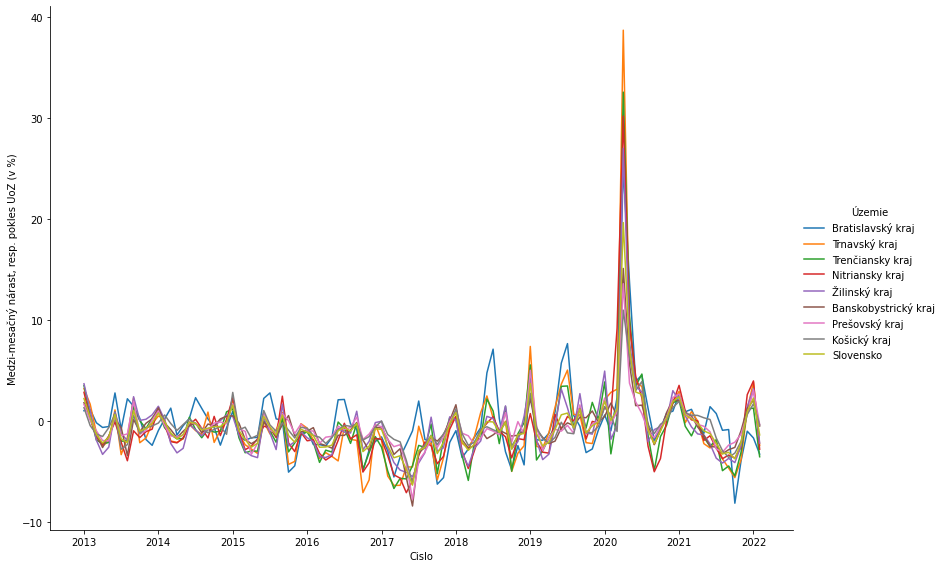

In [ ]:
# tu sme
temp_zoz=[a for a in uzemia_zoz if "kraj" in a]             # vytvorim si zoznam s menami krajov
temp_zoz.append("Slovensko")                                # pridam aj slovensko

temp=whole_data.copy().loc[idx[:,:,temp_zoz],:]             # vyberiem len riadky v ktorych je kraj (a teda nie okresy)

temp.pop("Cislo")                                           # precisluje riadky
cisla=()
for i in range(9): cisla+=tuple(range(10*12-10))
temp.insert(loc=0, column="Cislo", value=cisla)

mesiace={
    "Január":0, "Február":1, "Marec":2, "Apríl":3, "Máj":4, "Jún":5, 
    "Júl":6, "August":7, "September":8, "Október": 9, "November":10, "December":11,
}
temp.sort_values(by=["Rok","Mesiac"], key=lambda x: x.map(mesiace).fillna(x))      # zoradi stlpce najprv podla roku a zaroven podla mesiaca
display(temp)
r=sns.relplot(data=temp,                                                           # vykresli graf
    hue="Územie", x="Cislo", y="Medzi-mesačný nárast, resp. pokles UoZ (v %)",
    height=8, aspect=1.4142/1, kind="line")
r.set(xticks=list(range(0,10*12,12)))
r.set_xticklabels(list(range(2013,2023)))
#figure.show()

Územie Cislo * Odtok UoZ v mesiaci  \
                                                                
                                                                
Rok  Mesiac                                                     
2020 Apríl           Košický kraj    87                  1167   
     Apríl         Prešovský kraj    87                  1542   
     Apríl   Banskobystrický kraj    87                  1087   
     Apríl              Slovensko    87                  7397   
     Apríl      Bratislavský kraj    87                   639   
     Apríl          Žilinský kraj    87                   918   
     Apríl        Nitriansky kraj    87                   764   
     Apríl       Trenčiansky kraj    87                   661   
     Apríl          Trnavský kraj    87                   619   

            * Prítok UoZ v mesiaci  \
                                     
                                     
Rok  Mesiac                          
2020 Apríl                    3380   
     Apríl                    5225   
     Apríl                    3754   
     Apríl                   29275   
     Apríl                    2533   
     Apríl                    3836   
     Apríl                    4168   
     Apríl                    3208   
     Apríl                    3171   

            Disponibilný počet uchádzačov o zamestnanie  \
                                                          
                                                          
Rok  Mesiac                                               
2020 Apríl                                        34257   
     Apríl                                        41714   
     Apríl                                        29064   
     Apríl                                       180756   
     Apríl                                        13448   
     Apríl                                        19062   
     Apríl                                        16860   
     Apríl                                        13977   
     Apríl                                        12374   

            Ekonomicky aktívne obyvateľstvo  \
                                              
                                              
Rok  Mesiac                                   
2020 Apríl                         382235.0   
     Apríl                         402262.0   
     Apríl                         333506.0   
     Apríl                        2751678.0   
     Apríl                         362413.0   
     Apríl                         346991.0   
     Apríl                         340347.0   
     Apríl                         299363.0   
     Apríl                         284561.0   

            MIERA EVIDOVANEJ nezamestnanosti (v %)  \
                                                     
                                                     
Rok  Mesiac                                          
2020 Apríl                                    8.96   
     Apríl                                   10.37   
     Apríl                                    8.71   
     Apríl                                    6.57   
     Apríl                                    3.71   
     Apríl                                    5.49   
     Apríl                                    4.95   
     Apríl                                    4.67   
     Apríl                                    4.35   

            Medzi-mesačný nárast, resp. pokles UoZ (v %)  \
                                                           
                                                           
Rok  Mesiac                                                
2020 Apríl                                     11.003834   
     Apríl                                     13.620556   
     Apríl                                     15.130584   
     Apríl                                     19.672026   
     Apríl                                     25.096865   
     Apríl                                     27.025590   
   

' r=sns.relplot(data=temp,                                                           # vykresli graf\n    hue="Územie", x="Cislo", y="Medzi-mesačný nárast, resp. pokles UoZ (v %)",\n    height=8, aspect=1.4142/1, kind="line")\nr.set(xticks=list(range(0,10*12,12)))\nr.set_xticklabels(list(range(2013,2023))) '

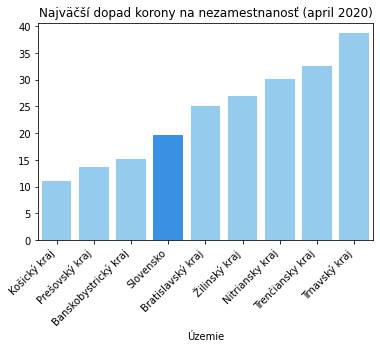

In [ ]:
april2020=temp.loc[idx[2020,"Apríl",:],:]
april2020.reset_index(level=2, inplace=True)
april2020 = april2020.sort_values("Medzi-mesačný nárast, resp. pokles UoZ (v %)")
clrs = ['dodgerblue' if (x == "Slovensko") else 'lightskyblue' for x in april2020.loc[:,idx["Územie"]]]

display(april2020)
a=sns.barplot(data=april2020, orient="v",
            x="Územie",
            y="Medzi-mesačný nárast, resp. pokles UoZ (v %)",palette=clrs)
a.set_xticklabels(a.get_xticklabels(), 
                    rotation=45, 
                    horizontalalignment='right')
a.set_ylabel("")
a.set_title("Najväčší dopad korony na nezamestnanosť (april 2020)");

''' r=sns.relplot(data=temp,                                                           # vykresli graf
    hue="Územie", x="Cislo", y="Medzi-mesačný nárast, resp. pokles UoZ (v %)",
    height=8, aspect=1.4142/1, kind="line")
r.set(xticks=list(range(0,10*12,12)))
r.set_xticklabels(list(range(2013,2023))) '''


In [ ]:
display(whole_data.loc[idx[2020,:,"Trnavský kraj"]])

Cislo * Odtok UoZ v mesiaci  \
                                                           
                                                           
Rok  Mesiac    Územie                                      
2020 Január    Trnavský kraj    84                  1773   
     Február   Trnavský kraj    85                  1519   
     Marec     Trnavský kraj    86                  1282   
     Apríl     Trnavský kraj    87                   619   
     Máj       Trnavský kraj    88                  1095   
     Jún       Trnavský kraj    89                  1743   
     Júl       Trnavský kraj    90                  1714   
     August    Trnavský kraj    91                  1584   
     September Trnavský kraj    92                  2691   
     Október   Trnavský kraj    93                  2012   
     November  Trnavský kraj    94                  1511   
     December  Trnavský kraj    95                   998   

                             * Prítok UoZ v mesiaci  \
                                                      
                                                      
Rok  Mesiac    Územie                                 
2020 Január    Trnavský kraj                   1523   
     Február   Trnavský kraj                   1301   
     Marec     Trnavský kraj                   1302   
     Apríl     Trnavský kraj                   3171   
     Máj       Trnavský kraj                   1702   
     Jún       Trnavský kraj                   2133   
     Júl       Trnavský kraj                   2072   
     August    Trnavský kraj                   1522   
     September Trnavský kraj                   2232   
     Október   Trnavský kraj                   2014   
     November  Trnavský kraj                   1533   
     December  Trnavský kraj                   1247   

                             Disponibilný počet uchádzačov o zamestnanie  \
                                                                           
                                                                           
Rok  Mesiac    Územie                                                      
2020 Január    Trnavský kraj                                        7580   
     Február   Trnavský kraj                                        7930   
     Marec     Trnavský kraj                                        8329   
     Apríl     Trnavský kraj                                       12374   
     Máj       Trnavský kraj                                       13796   
     Jún       Trnavský kraj                                       14442   
     Júl       Trnavský kraj                                       14894   
     August    Trnavský kraj                                       14794   
     September Trnavský kraj                                       14532   
     Október   Trnavský kraj                                       14391   
     November  Trnavský kraj                                       14451   
     December  Trnavský kraj                                       14809   

                             Ekonomicky aktívne obyvateľstvo  \
                                                               
                                                               
Rok  Mesiac    Územie                                          
2020 Január    Trnavský kraj                        283363.0   
     Február   Trnavský kraj                        283363.0   
     Marec     Trnavský kraj                        283363.0   
     Apríl     Trnavský kraj                        284561.0   
     Máj       Trnavský kraj                        284561.0   
     Jún       Trnavský kraj                        284561.0   
     Júl       Trnavský kraj                        285590.0   
     August    Trnavský kraj                        285590.0   
     September Trnavský kraj                        285590.0   
     Október   Trnavský kraj                        285965.0   
     November  Trnavský kraj                        285965.0   
     Decem

In [ ]:
# komplikovany sposob jednoduchej veci (pre kazdy okres zvlast subplot)
''' 
# vykresli grafy pre jednotlive okresy, kraje a Slovensko
figure, axes = plt.subplots(22,4, figsize=(60,300), sharey=True)
# to iste v jednom grafe
figure2, axes2 = plt.subplots(figsize=(30,30))
a,b=0,0
for i,uzemie in enumerate(uzemia_zoz):
    temp=whole_data.loc[idx[:,:,uzemie]].loc[:,idx[["MIERA EVIDOVANEJ nezamestnanosti (v %)","Medzi-mesačný nárast, resp. pokles UoZ (v %)"]]]
    temp.insert(loc=0, column="cislo", value=np.arange(len(temp)))
    axes[a,b].plot(temp["cislo"], temp.loc[:,"MIERA EVIDOVANEJ nezamestnanosti (v %)"], marker=".", ls="")
    axes[a,b].set_title(uzemie)
    axes[a,b].set_xticks(list(range(0,10*12,12)))
    axes[a,b].set_xticklabels(list(range(2013,2023)))
    axes2.plot(temp["cislo"], temp.loc[:,"MIERA EVIDOVANEJ nezamestnanosti (v %)"], ls="-", label=uzemie)
    b+=1
    if b==4: a,b=a+1,0
    None
axes2.set_xticks(list(range(0,10*12,12)))
axes2.set_xticklabels(list(range(2013,2023)))
axes2.legend()
None
 '''
None

In [ ]:
# momentalne nepotrebne
''' mesiace={
    "Január":0, "Február":1, "Marec":2, "Apríl":3, "Máj":4, "Jún":5, 
    "Júl":6, "August":7, "September":8, "Október": 9, "November":10, "December":11
}
whole_data_wide=(
    whole_data.reset_index(level=2)                                                 # z 
    .pivot(columns="Územie")
    .sort_values(by=["Rok","Mesiac"], key=lambda x: x.map(mesiace).fillna(x))       # zoradi stlpce najprv podla roku a zaroven podla mesiaca
)
whole_data_wide.pop("Cislo")
display(whole_data_wide.columns.values)
display(whole_data_wide.head(12)) '''
None

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

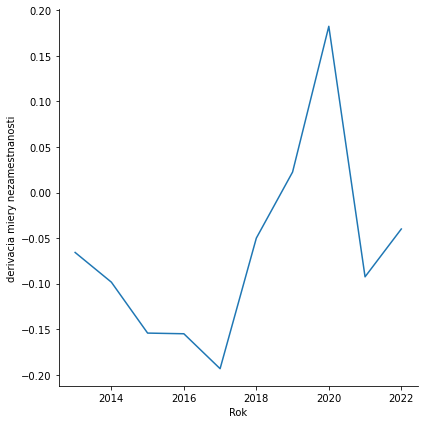

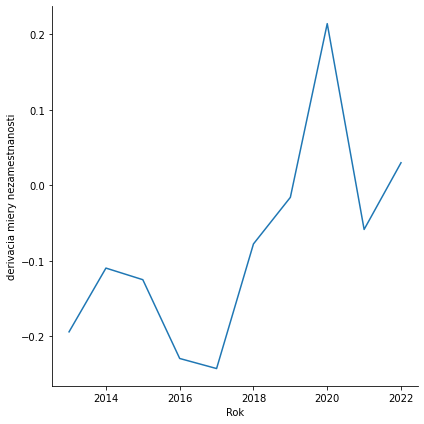

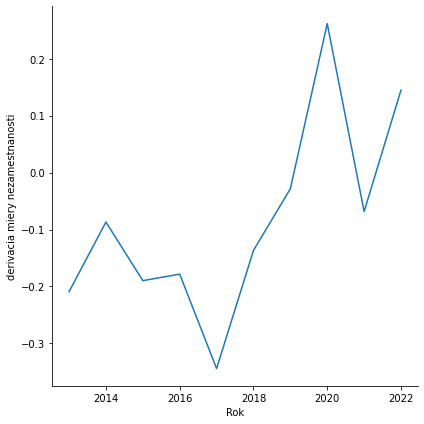

In [ ]:
# vykresli grafy po okresoch, krajoch
# !! dobre vsimnut si individualne skoky/prepady

#a=sns.relplot(data=whole_data, x="Cislo", y="MIERA EVIDOVANEJ nezamestnanosti (v %)", col="Územie", col_wrap=4, kind="line", height=6, aspect=1)
#a.set(xticks=list(range(0,10*12,12)))
#a.set_xticklabels(list(range(2013,2023)))
#DERIVACIE GRAFOV 
Prievidza = whole_data.query("Územie == 'Prievidza'")
Prievidza['derivacia miery nezamestnanosti'] = Prievidza["MIERA EVIDOVANEJ nezamestnanosti (v %)"].diff()
Priev_groupby = Prievidza.groupby("Rok").mean()
#pr = sns.relplot(data=Priev_groupby, x="Rok", y="derivacia miery nezamestnanosti", kind="line", height=6, aspect=1)
Jaguar = whole_data.query("Územie == 'Nitra'")
Jaguar['derivacia miery nezamestnanosti'] = Jaguar["MIERA EVIDOVANEJ nezamestnanosti (v %)"].diff()
Jaguar_groupby = Jaguar.groupby("Rok").mean()
#pr = sns.relplot(data=Jaguar_groupby, x="Rok", y="derivacia miery nezamestnanosti", kind="line", height=6, aspect=1)
Detva = whole_data.query("Územie == 'Detva'")
Detva['derivacia miery nezamestnanosti'] = Detva["MIERA EVIDOVANEJ nezamestnanosti (v %)"].diff()
Detva_groupby = Detva.groupby("Rok").mean()
#pr = sns.relplot(data=Detva_groupby, x="Rok", y="derivacia miery nezamestnanosti", kind="line", height=6, aspect=1)
for kraj in ['Trenčiansky kraj','Nitriansky kraj', 'Banskobystrický kraj']:
  TN = whole_data.query(f"Územie == '{kraj}'")
  TN['derivacia miery nezamestnanosti'] = TN["MIERA EVIDOVANEJ nezamestnanosti (v %)"].diff()
  TN_groupby = TN.groupby("Rok").mean()
  pr = sns.relplot(data=TN_groupby, x="Rok", y="derivacia miery nezamestnanosti", kind="line", height=6, aspect=1)
pass

# Vysvetlenie názvov stĺpcov:


> **Odtok UoZ v mesiaci:** počet ľudí, ktorí sa už neuchádzajú o zamestnanie


> **Prítok UoZ v mesiaci:** počet nových uchádzačov o zamestanie (UoZ)



> **Disponibilný počet uchádzačov o zamestnanie:** počet uchádzačov, ktorí sú k dispozicií?


> **Ekonomicky aktívne obyvateľstvo:** všetky osoby vo veku od 15 do 89 rokov (do roku 2020 od 15 rokov), ktoré patria medzi pracujúcich alebo nezamestnaných


> **Miera evidovanej nezamestnanosti:** Koľko % je disponibilný počet UoZ z celkového ekonomicky aktívneho obyvateľstva

> **Medzi-mesačný nárast, resp. pokles UoZ (v %):** (Stav UoZ ku koncu mesiaca - Stav UoZ ku koncu predch. mesiaca) / Stav UoZ ku koncu predch. mesiaca * 100


> **Mesiac:** proste mesiac


> **Miera nezamestnanosti vypočítaná z celkového počtu UoZ (v %):** Stav UoZ ku koncu mesiaca / (Ekonomicky aktívne obyvateľstvo / 100)



> **Nedisponibilný počet uchádzačov o zamestnanie:**

  *   **spolu**
  *   **z toho:**
    *   **Absolventská prax**
    *   **Dobrovoľnícka služba**
    *   **Dočasná prac. neschopnosť a OČR**


> **Stav UoZ ku koncu mesiaca:** počet uchádzačov o zamestnanie ku koncu mesiaca


> **Stav UoZ ku koncu predch. mesiaca:** počet uchádzačov o zamestnanie ku koncu predchadzájúceho mesiaca 























#Choropleth pre Apríl 2020

In [ ]:
! pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.4 MB/s 
     |████████████████████████████████| 16.7 MB 331 kB/s 
     |████████████████████████████████| 6.3 MB 34.0 MB/s 


In [ ]:
import geopandas

In [ ]:
# selektovanie dát pre apríl 2020 a medzi-mesačného nárastu
# TODO: refaktorovať, podobnú tabuľku sme vyrvárali vyššie ale iba pre kraje, tu potrebujem aj okresy
april2020geo = whole_data.loc[idx[2020,"Apríl",:],:] \
                  .reset_index().set_index('Územie') \
                  .loc[:, ['Medzi-mesačný nárast, resp. pokles UoZ (v %)']]

# vytvorenie dát pre geozobrazenie v krajoch
geo_kraje_april2020 = geopandas.read_file('geo_kraje.json').rename(columns={'TXT':'Územie'}).set_index('Územie')
geo_kraje_april2020['Medzi-mesačný nárast, resp. pokles UoZ (v %)'] = april2020geo['Medzi-mesačný nárast, resp. pokles UoZ (v %)']

# vytvorenie dát pre geozobrazenie v okresoch
geo_okresy_april2020 = geopandas.read_file('geo_okresy.json').rename(columns={'TXT':'Územie'}).set_index('Územie')
geo_okresy_april2020['Medzi-mesačný nárast, resp. pokles UoZ (v %)'] = april2020geo['Medzi-mesačný nárast, resp. pokles UoZ (v %)']

# geo dáta boli pod licenciou ODbL stiahnuté z https://wiki.freemap.sk/HraniceAdministrativnychUzemi

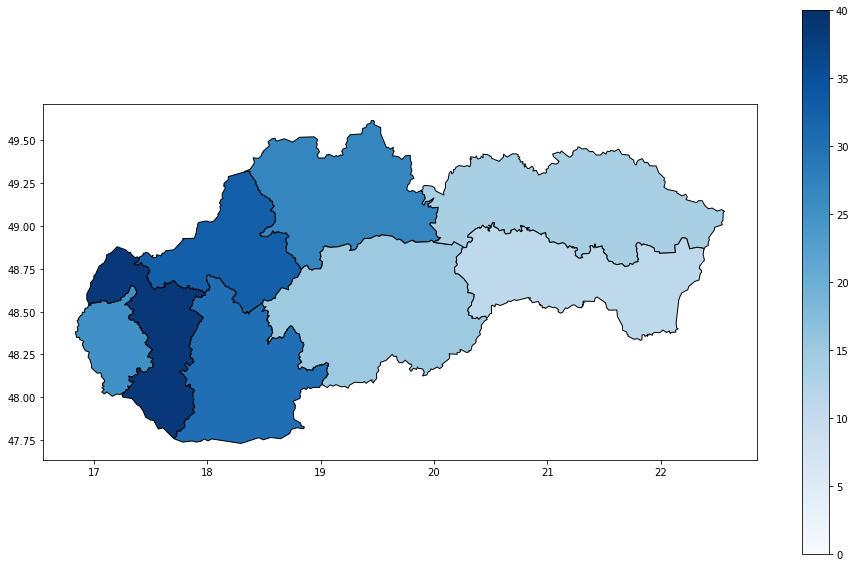

In [ ]:
# Geozobrazenie mezdi-mesačného nárastu apríl 2020 v krajoch
geo_kraje_april2020.plot(column='Medzi-mesačný nárast, resp. pokles UoZ (v %)',
                         figsize=(16,10),
                         legend=True, 
                         cmap='Blues', vmin=0, vmax=40,
                         edgecolor='black', linewidth=1)

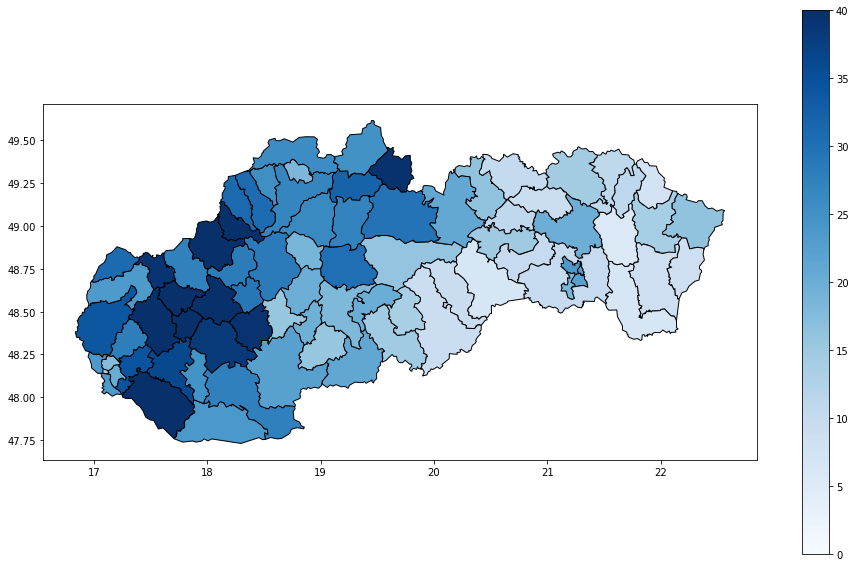

In [ ]:
# Geozobrazenie mezdi-mesačného nárastu apríl 2020 v okresoch
geo_okresy_april2020.plot(column='Medzi-mesačný nárast, resp. pokles UoZ (v %)',
                          figsize=(16,10),
                          legend=True, 
                          cmap='Blues', vmin=0, vmax=40,
                          edgecolor='black', linewidth=1)

geo dáta animované v gife

In [ ]:
import imageio # pre vytváranie gifov
import itertools # pre karteziánsky súčin
import os # pre správu súborov
from IPython.display import Image # pre zobrazenie obrázka

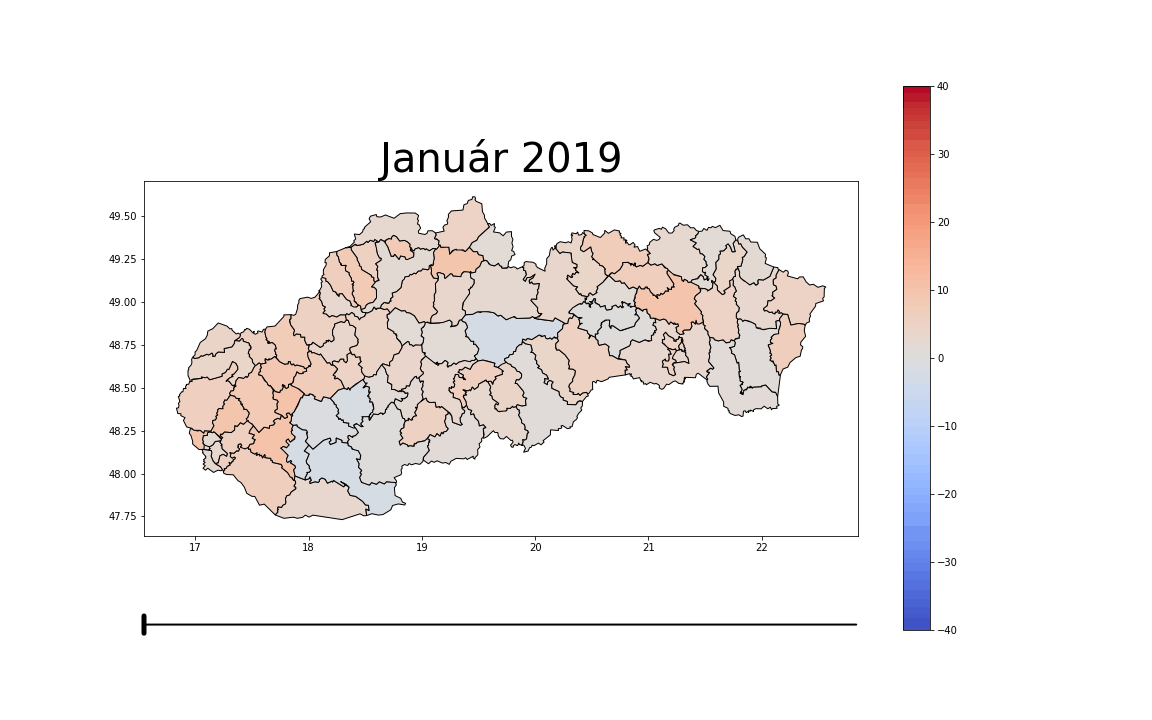

In [ ]:
# načítanie geo dát pre okresy
geo_okresy = geopandas.read_file('geo_okresy.json').rename(columns={'TXT':'Územie'}).set_index('Územie')

# funkcia pre získanie geo dát okresov MM nárastu pre daný rok a mesiac
# z tabulky whole_data
def get_geo_mmnarast_okresy_pre_obdobie(rok, mesiac):
  data_obdobie = whole_data.loc[idx[rok,mesiac,:],:] \
                    .reset_index().set_index('Územie') \
                    .loc[:, ['Medzi-mesačný nárast, resp. pokles UoZ (v %)']]
  geo_data_obdobie = geo_okresy.copy(deep=True)
  geo_data_obdobie['Medzi-mesačný nárast, resp. pokles UoZ (v %)'] = data_obdobie['Medzi-mesačný nárast, resp. pokles UoZ (v %)']
  return geo_data_obdobie

# iteracia cez obdobia a vytvaranie ich plotov
obdobia = list(itertools.product([2019, 2020], list(mesiace.keys())))   


for i, obdobie in enumerate(obdobia):
  geo_data_obdobie = get_geo_mmnarast_okresy_pre_obdobie(obdobie[0], obdobie[1])
  a = geo_data_obdobie.plot(column='Medzi-mesačný nárast, resp. pokles UoZ (v %)',
                          figsize=(16,10),
                          legend=True, 
                          cmap='coolwarm', vmin=-40, vmax=40,
                          edgecolor='black', linewidth=1)
  a.set_title(f'{obdobie[1]} {obdobie[0]}', fontdict = {'fontsize' : 40})

  a.annotate('', xy=(0, -0.25), xycoords='axes fraction', xytext=(1, -0.25),
      arrowprops=dict(arrowstyle="-", color='k', linewidth=2))
  pos = i / (len(obdobia) - 1)
  a.annotate('', xy=(pos, -0.22), xycoords='axes fraction', xytext=(pos, -0.28),
      arrowprops=dict(arrowstyle="-", color='k', linewidth=5))

  plt.savefig(f'{obdobie[0]}{obdobie[1]}.png')
  plt.close()

# vytvorenie gifu
# gif sa uloží medzi súbory

frames = []

for obdobie in obdobia:
  filename = f'{obdobie[0]}{obdobie[1]}.png'
  image = imageio.imread(filename)
  frames.append(image)

imageio.mimsave('geo_okresy.gif', frames, format='GIF', duration=0.5)

# zmazanie nepotrebných súborov
for obdobie in obdobia:
  filename = f'{obdobie[0]}{obdobie[1]}.png'
  os.remove(filename)

# zobrazenie gifu
display(Image(data=open('geo_okresy.gif','rb').read(), format='png'))

# IQR

Rok   Mesiac   Územie           
2013  Január   Bratislavský kraj    1.041372
      Február  Bratislavský kraj    1.165882
      Marec    Bratislavský kraj   -0.152123
      Apríl    Bratislavský kraj   -0.614035
      Máj      Bratislavský kraj   -0.524922
                                      ...   
2022  Február  Prešovský kraj      -0.329864
      Január   Košický kraj         1.730901
      Február  Košický kraj        -0.361498
      Január   Slovensko            2.297415
      Február  Slovensko           -1.355303
Name: Medzi-mesačný nárast, resp. pokles UoZ (v %), Length: 882, dtype: float64

Outliers outside of range: pp[-5.4804084973898695, 3.2376818615131095]


/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:1068: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (3 levels on the left,1 on the right)
  right_index=True,


Text(-10, 3.2376818615131095, '3.24')

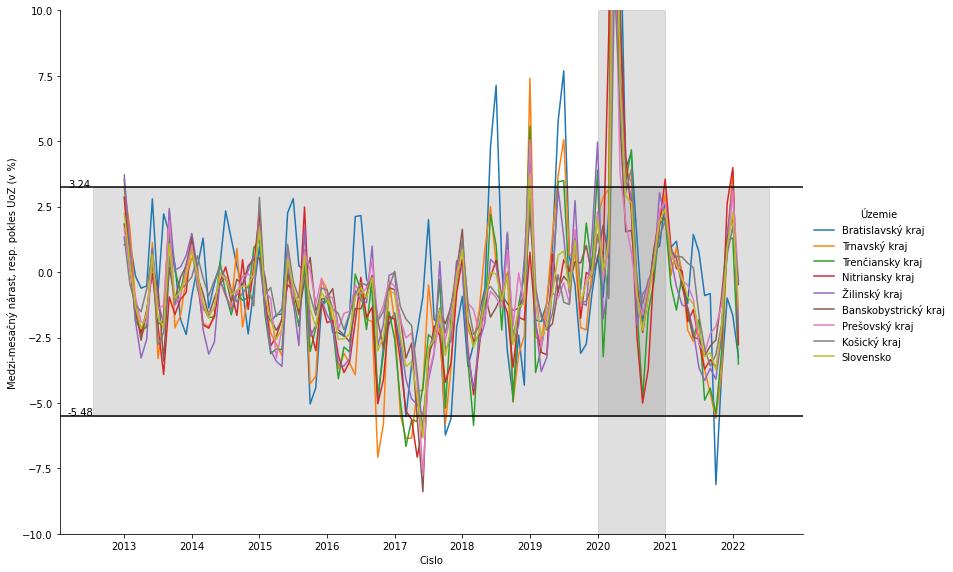

In [ ]:
#tabulka bez koronoveho obdobia ktora sa bude pouzivat na zistenie outlierov 
tab_iqr = temp.copy(deep=True)
list_rokov = [2013,2014,2015,2016,2017,2018,2019,2021,2022]
tab_iqr = tab_iqr.loc[idx[list_rokov,:,:],:] #vsetko bez roku 2020

# tab_iqr.reset_index(level=2, inplace=True)#ak zakomentujes tak tam budu aj uzemia
kvantily = tab_iqr["Medzi-mesačný nárast, resp. pokles UoZ (v %)"]

display(kvantily)

q1 = kvantily.quantile(0.25)
q3 = kvantily.quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr
print(f"Outliers outside of range: pp[{lower}, {upper}]")
a=sns.relplot(data=temp,                                                           # vykresli graf
    hue="Územie", x="Cislo", y="Medzi-mesačný nárast, resp. pokles UoZ (v %)",
    height=8, aspect=1.4142/1, kind="line")
a.set(xticks=list(range(0,10*12,12)))
a.set_xticklabels(list(range(2013,2023)))
plt.ylim(-10,10)
plt.axhline(y=lower, color='k', linestyle='-')
plt.axhline(y=upper, color='k', linestyle='-')
plt.fill_betweenx(plt.ylim(), 84, 96,
                color='gray', alpha=0.25 )
plt.fill_between(plt.xlim(), lower, upper,
                color='gray', alpha=0.25 )
plt.text(-10,lower, round(lower,2))
plt.text(-10,upper, round(upper,2))

#count = tab_iqr.query('Medzi-mesačný nárast, resp. pokles UoZ (v %) < @lower or Medzi-mesačný nárast, resp. pokles UoZ (v %) > @upper')["Medzi-mesačný nárast, resp. pokles UoZ (v %)"].count()

{2013: (-5.4804084973898695, 3.2376818615131095), 2014: (-5.0417881473794655, 3.928413703571065), 2015: (-3.963143529065822, 2.751105034561716), 2016: (-4.390019586916302, 2.959362549223961), 2017: (-4.523275890209174, 2.573333058556953), 2018: (-5.2299299904096115, 2.751353575006713), 2019: (-5.388342309917646, 2.8841960726542726), 2020: (-5.24359752771157, 2.962496179481055), 2022: (-5.4608860549186335, 3.2008830909798753)}


/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:1068: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (3 levels on the left,1 on the right)
  right_index=True,


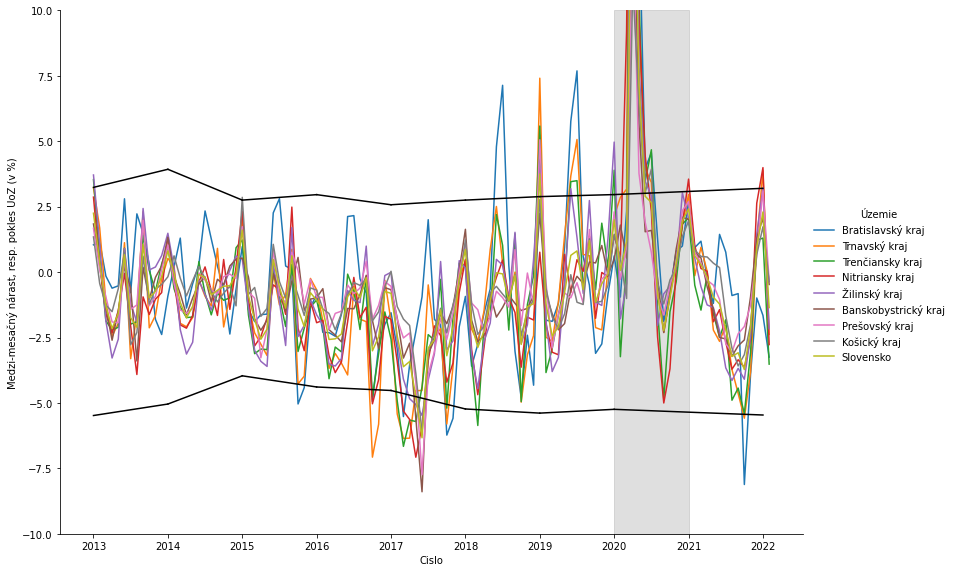

In [ ]:
# IQR - pocitanie IQR v istom casovom bode podla udajov len z minulosti
# Verzia, kde su v tabulke vynechane korona roky.

#funkcia, ktora pocita (lower, upper) IQR
def iqr(df):
  q1 = df.quantile(0.25)
  q3 = df.quantile(0.75)
  iqr = q3 - q1

  lower = q1 - 1.5 * iqr
  upper = q3 + 1.5 * iqr
  return (lower,upper)

#tabulka bez koronoveho obdobia, ktora sa bude pouzivat na zistenie outlierov 
tab_iqr = temp.copy(deep=True)
list_rokov = [2013,2014,2015,2016,2017,2018,2019,2021,2022]
lower_upper_podla_roku = {}

# pocitanie pre 2013
lower_upper_podla_roku[2013] = iqr(tab_iqr.loc[idx[list_rokov[:i],:,:],:]["Medzi-mesačný nárast, resp. pokles UoZ (v %)"])

#pocitanie IQR pre n-ty rok podla rokov < n
for i, year in enumerate(list_rokov[:-1], start = 1):
  foo = tab_iqr.loc[idx[list_rokov[:i],:,:],:]
  #print(list_rokov[:i])
  #display(tab_iqr)
  kvantily = foo["Medzi-mesačný nárast, resp. pokles UoZ (v %)"]
  lower_upper_podla_roku[year+1] = iqr(kvantily)

# toto vypocita IQR aj pre rok 2020 podla vsetkych rokov z minulosti
# ale skipuje pocitanie pre rok 2021 kvoli korone (vid obsah @lower_upper_podla_roku).
print(lower_upper_podla_roku)
# otazkou je, ze ci to chceme tak, alebo este dodatocne vypocitat iqr pre 2021
# podla vsetkych rokov bez 2020 a to IQR pre rok 2020 nechat alebo sa nan vysrat


#graf
a=sns.relplot(data=temp,                                                           # vykresli graf
    hue="Územie", x="Cislo", y="Medzi-mesačný nárast, resp. pokles UoZ (v %)",
    height=8, aspect=1.4142/1, kind="line")
a.set(xticks=list(range(0,10*12,12)))
a.set_xticklabels(list(range(2013,2023)))
plt.ylim(-10,10)
plt.fill_betweenx(plt.ylim(), 84, 96,
                color='gray', alpha=0.25 )

#roky pre ktore mame IQR
iqr_roky = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2022]
'''xko = []
for j in iqr_roky:
  if j == 2022:
    xko.append(12*(j+1))
  else:
    xko.append(12*j)
x = np.array(xko)
y = np.array([lower_upper_podla_roku[rok][1] for rok in iqr_roky])
print("toto je x", x)
print("toto je y", y)
xnew = np.linspace(x.min(), x.max(), 300)
print("toto je xnew", xnew)
gfg = make_interp_spline(x, y, k=3)
  
y_new = gfg(xnew)
  
plt.plot(xnew, y_new)'''

for j, rok in enumerate(iqr_roky):
  if rok == 2022:
    j += 1
    up = [lower_upper_podla_roku[rok-2][1],lower_upper_podla_roku[rok][1]]
    low = [lower_upper_podla_roku[rok-2][0],lower_upper_podla_roku[rok][0]]
    plt.plot([12*(j-2),12*j],up,color="black") # spoj upper
    plt.plot([12*(j-2),12*j],low,color="black") # spoj lower    
  if rok < 2021 and rok > 2013:
    up = [lower_upper_podla_roku[rok-1][1],lower_upper_podla_roku[rok][1]]
    low = [lower_upper_podla_roku[rok-1][0],lower_upper_podla_roku[rok][0]]
    plt.plot([12*(j-1),12*j],up,color="black") # vypis upper
    plt.plot([12*(j-1),12*j],low,color="black") # vypis lower

  









Rok   Mesiac  Územie              
2013  Január  Bratislavský kraj       1.041372
              Trnavský kraj           3.221270
              Trenčiansky kraj        3.535284
              Nitriansky kraj         2.865182
              Žilinský kraj           3.710648
              Banskobystrický kraj    1.838659
              Prešovský kraj          1.670331
              Košický kraj            1.343347
              Slovensko               2.249576
Name: Medzi-mesačný nárast, resp. pokles UoZ (v %), dtype: float64

{0: (-0.6560786250214825, 5.547679485824585), 1: (-0.6560786250214825, 5.547679485824585), 2: (-1.694342553064909, 5.600896684348278), 3: (-3.9309737585217612, 5.957906094787314), 4: (-6.100697809822404, 6.602273176304363), 5: (-6.475490207370614, 6.557823190895636), 6: (-6.021431070271474, 6.0238008882251926), 7: (-5.888893695820526, 5.4697330415402785), 8: (-6.415417520233024, 5.647358807298501), 9: (-6.596900399715265, 6.107495665480508), 10: (-5.925564853639811, 5.38709837151998), 11: (-5.678348115424159, 5.1184820087309015), 12: (-5.538662257282642, 4.989392811913643), 13: (-5.464354690841807, 4.944808272049142), 14: (-5.231528918627169, 4.765942942371397), 15: (-5.1557838421596065, 4.590379721355888), 16: (-5.198036240386076, 4.421682783752699), 17: (-5.063725520746218, 4.089826583903944), 18: (-4.888209045909067, 3.9194050506284324), 19: (-4.788402257269897, 3.776382169505324), 20: (-4.563092388953684, 3.5745879927279263), 21: (-4.428081606165925, 3.406865481476442), 22: (-4.229

/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:1068: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (3 levels on the left,1 on the right)
  right_index=True,


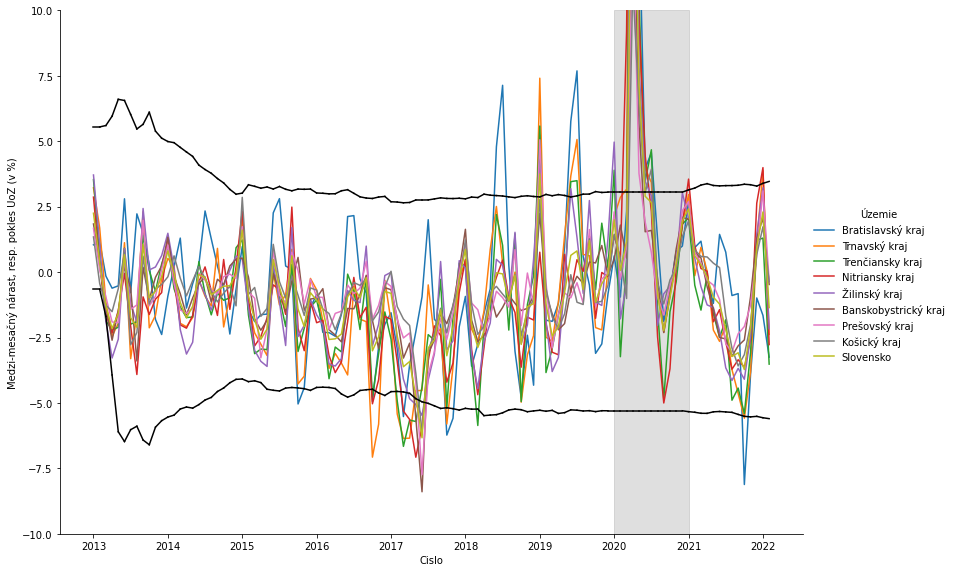

In [ ]:
#IQR pre kazdy mesiac v roku

#funkcia, ktora pocita (lower, upper) IQR
def iqr(df):
  q1 = df.quantile(0.25)
  q3 = df.quantile(0.75)
  iqr = q3 - q1

  lower = q1 - 1.5 * iqr
  upper = q3 + 1.5 * iqr
  return (lower,upper)

# pre kazdy kraj 110 riadokv od 0-109
# kazdemu mesiacu prilieha cislo v stlpci 'Cislo' z tohoto intervalu
# januar 2013 -> 0
# februar 2022 -> 109

tab_iqr = temp.copy(deep=True)
lower_upper_podla_mesiaca = {}
#pociatocna tabulka
df = temp[temp.Cislo == 0]["Medzi-mesačný nárast, resp. pokles UoZ (v %)"]
display(df)

#vypocitane iqr pre prvy mesiac, resp. pre januar 2013
lower_upper_podla_mesiaca[0] = iqr(df)

#pocita Iqr podla minulych mesiacov, tak ze kazdym prechodom cyklom sa tabulka v premennej @df rozrastie o tabulku v premennej @foo, ktora obsahuje vzdy novy mesiac. 
for i in range(1, 110):
  #ciastocne ignoruje koronu, resp cely rok 2020
  # mesiacom v roku 2020 priliehaju cisla 84-95 a teda tieto mesiace sa nebudu pripajat do tabulky @df a teda pre cely rok 2020 budu konstante iqr hodnoty (hodnoty z 83.mesiaca).. od 96. mesiaca sa mesiace zacnu pripajat do @df a obnovi sa pocitanie tak ako do roku 2020
  if i not in range(84,96):
    foo = temp[temp.Cislo == i-1]["Medzi-mesačný nárast, resp. pokles UoZ (v %)"]
    df = pd.concat((df,foo))
  
  # Aj s koronou
  '''
  foo = temp[temp.Cislo == i-1]["Medzi-mesačný nárast, resp. pokles UoZ (v %)"]
  df = pd.concat((df,foo))
  '''
  lower_upper_podla_mesiaca[i] = iqr(df)

print(lower_upper_podla_mesiaca)

# vykresli graf
a=sns.relplot(data=temp,
    hue="Územie", x="Cislo", y="Medzi-mesačný nárast, resp. pokles UoZ (v %)",
    height=8, aspect=1.4142/1, kind="line")
a.set(xticks=list(range(0,10*12,12)))
a.set_xticklabels(list(range(2013,2023)))
plt.ylim(-10,10)
plt.fill_betweenx(plt.ylim(), 84, 96,
                color='gray', alpha=0.25 )

'''for j in range(110):
#Bodove markere
  #upper
  plt.plot([j], [lower_upper_podla_mesiaca[j][1]], 'k.' )
  #lower
  plt.plot([j], [lower_upper_podla_mesiaca[j][0]], 'k.')'''

for j in range(109):
    up = [lower_upper_podla_mesiaca[j][1], lower_upper_podla_mesiaca[j+1][1]]
    low = [lower_upper_podla_mesiaca[j][0],lower_upper_podla_mesiaca[j+1][0]]
    plt.plot([j,j+1],up,color="black") # spoj upper
    plt.plot([j,j+1],low,color="black") # spoj lower    




{0: (-0.6560786250214825, 5.547679485824585), 1: (-0.6560786250214825, 5.547679485824585), 2: (-1.694342553064909, 5.600896684348278), 3: (-3.9309737585217612, 5.957906094787314), 4: (-6.100697809822404, 6.602273176304363), 5: (-6.475490207370614, 6.557823190895636), 6: (-6.021431070271474, 6.0238008882251926), 7: (-5.888893695820526, 5.4697330415402785), 8: (-6.415417520233024, 5.647358807298501), 9: (-6.596900399715265, 6.107495665480508), 10: (-5.925564853639811, 5.38709837151998), 11: (-5.678348115424159, 5.1184820087309015), 12: (-5.538662257282642, 4.989392811913643), 13: (-5.464354690841807, 4.944808272049142), 14: (-5.231528918627169, 4.765942942371397), 15: (-5.1557838421596065, 4.590379721355888), 16: (-5.198036240386076, 4.421682783752699), 17: (-5.063725520746218, 4.089826583903944), 18: (-4.888209045909067, 3.9194050506284324), 19: (-4.788402257269897, 3.776382169505324), 20: (-4.563092388953684, 3.5745879927279263), 21: (-4.428081606165925, 3.406865481476442), 22: (-4.229

Rok    Mesiac             Územie  \
1  2016   Október      Trnavský kraj   
2  2017     Marec   Trenčiansky kraj   
1  2017     Marec      Trnavský kraj   
1  2017     Apríl      Trnavský kraj   
1  2016  November      Trnavský kraj   
0  2017     Marec  Bratislavský kraj   
1  2017   Február      Trnavský kraj   
3  2017     Marec    Nitriansky kraj   
0  2015   Október  Bratislavský kraj   
3  2016   Október    Nitriansky kraj   
0  2016   Október  Bratislavský kraj   
2  2017   Február   Trenčiansky kraj   
2  2016   Október   Trenčiansky kraj   
4  2013     Marec      Žilinský kraj   
2  2013     Marec   Trenčiansky kraj   

  Medzi-mesačný nárast, resp. pokles UoZ (v %)   hodnota delta iqr  \
1                                    -7.070879 -4.477743  2.593135   
2                                    -6.658492 -4.578574  2.079919   
1                                     -6.35531 -4.578574  1.776736   
1                                    -6.346125 -4.633195   1.71293   
1                                    -5.811758 -4.617084  1.194674   
0                                    -5.519667 -4.578574  0.941094   
1                                    -5.422205 -4.560314  0.861891   
3                                    -5.310322 -4.578574  0.731748   
0                                     -5.03831 -4.426984  0.611326   
3                                    -5.031939 -4.477743  0.554196   
0                                    -4.945237 -4.477743  0.467494   
2                                    -4.921689 -4.560314  0.361375   
2                                    -4.769811 -4.477743  0.292067   
4                                    -1.873765 -1.694343  0.179423   
2                                    -1.861766 -1.694343  0.167423   

                            type                      pomenovanie  
1  pokles nezamestnanosti(lower)      Trnavský kraj, Október 2016  
2  pokles nezamestnanosti(lower)     Trenčiansky kraj, Marec 2017  
1  pokles nezamestnanosti(lower)        Trnavský kraj, Marec 2017  
1  pokles nezamestnanosti(lower)        Trnavský kraj, Apríl 2017  
1  pokles nezamestnanosti(lower)     Trnavský kraj, November 2016  
0  pokles nezamestnanosti(lower)    Bratislavský kraj, Marec 2017  
1  pokles nezamestnanosti(lower)      Trnavský kraj, Február 2017  
3  pokles nezamestnanosti(lower)      Nitriansky kraj, Marec 2017  
0  pokles nezamestnanosti(lower)  Bratislavský kraj, Október 2015  
3  pokles nezamestnanosti(lower)    Nitriansky kraj, Október 2016  
0  pokles nezamestnanosti(lower)  Bratislavský kraj, Október 2016  
2  pokles nezamestnanosti(lower)   Trenčiansky kraj, Február 2017  
2  pokles nezamestnanosti(lower)   Trenčiansky kraj, Október 2016  
4  pokles nezamestnanosti(lower)        Žilinský kraj, Marec 2013  
2  pokles nezamestnanosti(lower)     Trenčiansky kraj, Marec 2013

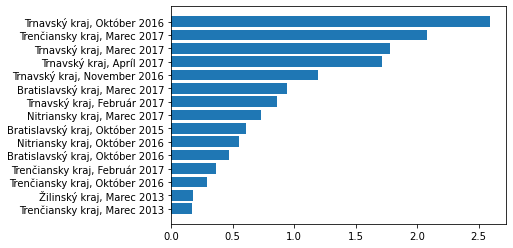

In [ ]:
# *Hladanie outlying krajov*
print(lower_upper_podla_mesiaca)

outliers = pd.DataFrame()
l_outliers = pd.DataFrame()
u_outliers = pd.DataFrame()

for i in range(110):
  
  #ignoruje outliere sposobene koronou
  if i in range(84,96):
    continue
  
  lower, upper = lower_upper_podla_mesiaca[i]
  df = temp[temp.Cislo == i]["Medzi-mesačný nárast, resp. pokles UoZ (v %)"]
  df = df.reset_index()

  first = True
  for j, row in df.iterrows():
    iqr_val = row["Medzi-mesačný nárast, resp. pokles UoZ (v %)"]
    if iqr_val < lower:
      delta_iqr = abs(abs(lower) - abs(iqr_val))
      row['hodnota'] = lower
      row['delta iqr'] = delta_iqr
      row['type'] = 'pokles nezamestnanosti(lower)'
      l_outliers = pd.concat((l_outliers,row), axis=1, join='outer')
    elif iqr_val > upper:
      delta_iqr = abs(upper - iqr_val)
      row['hodnota'] = upper
      row['delta iqr'] = delta_iqr
      row['type'] = 'vzrast nezamestnanosti(upper)'
      u_outliers = pd.concat((u_outliers,row), axis=1, join='outer')


l_outliers.transpose()
u_outliers.transpose()
  
outliers = pd.concat((l_outliers, u_outliers), axis=1)
outliers = outliers.transpose()

#display(outliers.query("type == 'pokles nezamestnanosti(lower)'").sort_values(by='delta iqr', ascending = False))

outliers['pomenovanie'] = outliers["Územie"] + ", "  +  outliers["Mesiac"] + " " + outliers["Rok"].astype("string")


outliers.reset_index()
outliers = outliers.query("Rok < 2020").head(15)
a = plt.barh(y=outliers.sort_values(by="delta iqr")["pomenovanie"], width=outliers.sort_values(by="delta iqr")["delta iqr"])

display(outliers.query("type == 'pokles nezamestnanosti(lower)'").sort_values(by='delta iqr', ascending = False))

#sns.barplot(x=outliers['delta iqr'], y=)



# Absolútny počet UoZ porovnanie marec a apríl 2020

Hypotéza: kraje z najvyším nárastom uchádzačov o zamestnanie v apríli 2020 mali nízky počet uchádzačov o zamestnanie pred pandémiou.

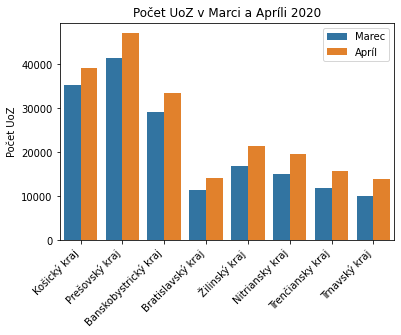

In [ ]:
marec2020kraje = whole_data.loc[idx[2020,'Marec',temp_zoz[:-1]],:].reset_index()
april2020kraje = whole_data.loc[idx[2020,'Apríl',temp_zoz[:-1]],:].reset_index()

rozdiel2020kraje = april2020kraje.loc[:,['Územie', 'Medzi-mesačný nárast, resp. pokles UoZ (v %)', 'Stav UoZ ku koncu mesiaca', 'Stav UoZ ku koncu predch. mesiaca']] \
                      .rename(columns={'Stav UoZ ku koncu mesiaca' : 'Apríl', 'Stav UoZ ku koncu predch. mesiaca' : 'Marec'}) \
                      .melt(id_vars=['Územie', 'Medzi-mesačný nárast, resp. pokles UoZ (v %)'],  var_name='Mesiac') \
                      .sort_values(by='Mesiac', ascending=False) \
                      .sort_values(by='Medzi-mesačný nárast, resp. pokles UoZ (v %)')

axes=sns.barplot(data=rozdiel2020kraje, orient="v",
            x='Územie',
            y='value',
            hue='Mesiac')

axes.set_title('Počet UoZ v Marci a Apríli 2020')
axes.set_ylabel('Počet UoZ')
axes.set_xlabel('')
axes.set_xticklabels(axes.get_xticklabels(), 
                    rotation=45, 
                    horizontalalignment='right')
axes.legend(title='')

/usr/local/lib/python3.7/dist-packages/seaborn/relational.py:1068: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (3 levels on the left,1 on the right)
  right_index=True,


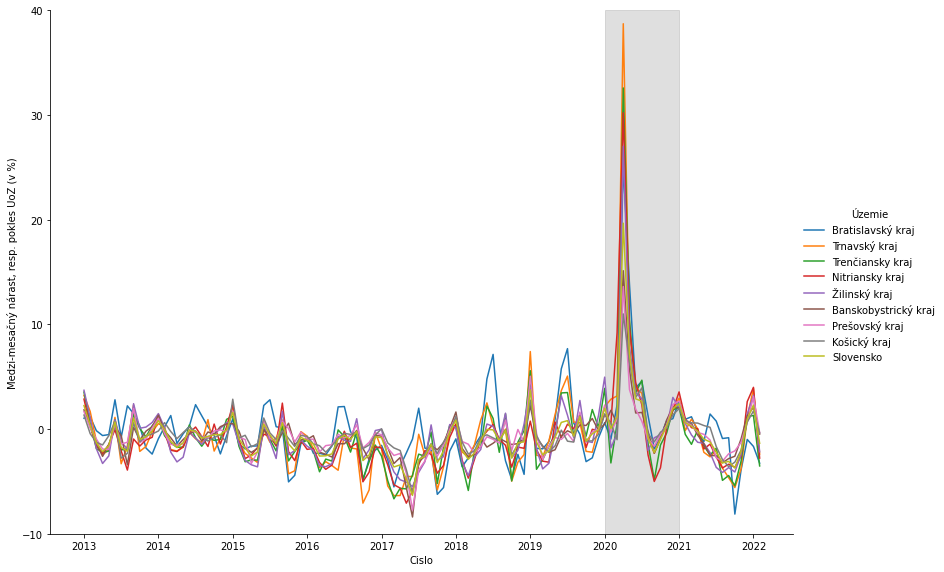

In [ ]:
# pre roderika zvyraznena korona

a=sns.relplot(data=temp,                                                           # vykresli graf
    hue="Územie", x="Cislo", y="Medzi-mesačný nárast, resp. pokles UoZ (v %)",
    height=8, aspect=1.4142/1, kind="line")
a.set(xticks=list(range(0,10*12,12)))
a.set_xticklabels(list(range(2013,2023)))
plt.ylim(-10,40)
plt.fill_betweenx(plt.ylim(), 84, 96,
                color='gray', alpha=0.25 )

In [ ]:
print(*list(tab_iqr.columns), sep="\n")

('Cislo', '', '')
('* Odtok UoZ v mesiaci', '', '')
('* Prítok UoZ v mesiaci', '', '')
('Disponibilný počet uchádzačov o zamestnanie', '', '')
('Ekonomicky aktívne obyvateľstvo', '', '')
('MIERA EVIDOVANEJ nezamestnanosti (v %)', '', '')
('Medzi-mesačný nárast, resp. pokles UoZ (v %)', '', '')
('Miera nezamestnanosti vypočítaná z celkového počtu UoZ (v %)', '', '')
('Nedisponibilný počet uchádzačov o zamestnanie', 'spolu', '')
('Nedisponibilný počet uchádzačov o zamestnanie', 'z toho', 'Absolventská prax')
('Nedisponibilný počet uchádzačov o zamestnanie', 'z toho', 'Dobrovoľnícka služba')
('Nedisponibilný počet uchádzačov o zamestnanie', 'z toho', 'Dočasná prac. neschopnosť a OČR')
('Nedisponibilný počet uchádzačov o zamestnanie', 'z toho', 'Menšie obecné služby')
('Nedisponibilný počet uchádzačov o zamestnanie', 'z toho', 'Pomôž svojej obci')
('Nedisponibilný počet uchádzačov o zamestnanie', 'z toho', 'Vzdelávanie a príprava pre trh práce')
('Stav UoZ ku koncu mesiaca', '', '')
('Stav

In [ ]:
# figure, axes = plt.subplots()
#print(*list([a for a in uzemia_zoz if "p" in a.lower()])
#print(*uzemia_zoz, sep="\n")
#display(whole_data.loc[idx[]])
axes = sns.lineplot(data=whole_data.loc[idx[:,:,"Prievidza"],idx[:]], x="Cislo", y="Disponibilný počet uchádzačov o zamestnanie")
#axes.set(xticks=list(range(0,10*12,12)))
axes.set_xticklabels(whole_data.loc[])
axes.set(xlim=(20,35))
axes.set_title("Prievidza 2013 - Brose")
axes.axvline(29)
axes.axvline(24)

SyntaxError: ignored

In [ ]:
#whole_data.index.to_list()
#whole_data.
#INTERPOLARIZOVANE KRIVKY PRE IQR PODLA ROKOV
from scipy.interpolate import make_interp_spline
interpol = []
for j in iqr_roky:
  if j == 2022:
    interpol.append(12*(j+1))
  else:
    interpol.append(12*j)
x = np.array(interpol)
y = np.array([lower_upper_podla_roku[rok][1] for rok in iqr_roky])
xnew = np.linspace(x.min(), x.max(), 300)
gfg = make_interp_spline(x, y, k=3)
  
y_new = gfg(xnew)
plt.plot(xnew, y_new)
y1 = np.array([lower_upper_podla_roku[rok][0] for rok in iqr_roky])
xnew = np.linspace(x.min(), x.max(), 300)
gfg = make_interp_spline(x, y1, k=3)
  
y_new = gfg(xnew)
plt.plot(xnew, y_new)


In [ ]:
temp=whole_data.loc()
display(whole_data)